# Multi-bar Plots

import libs and set default configurations

In [39]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.rc("font", family="Times New Roman", size=14)
plt.rcParams["lines.linewidth"] = 2
plt.rcParams["text.usetex"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.major.width"] = 1.5
plt.rcParams["xtick.major.size"] = 4
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.right"] = True
plt.rcParams["ytick.major.width"] = 1.5
plt.rcParams["ytick.major.size"] = 4
line_configs = {"linewidth": 2, "markersize": 12, "markeredgewidth": 1.5, "fillstyle": "none"}
bar_configs = {"width": 0.2, "edgecolor": 'k', "linewidth": 1.5}

In [108]:
%config InlineBackend.print_figure_kwargs = {"bbox_inches": None}

prerequisite functions

In [40]:
def rgb2hex(rgb):
    color = "#"
    for num in rgb:
        hex_num = hex(num)
        color += hex_num[2:].zfill(2)
    return color

function to draw a 1*3 multi-bar plot

In [168]:
def draw_three_dataset_multibar(exp_results: tuple, dataset_names, method_labels, save_dir, exp_name):
    colors = [rgb2hex([248, 230, 32]), rgb2hex([53, 183, 119]), rgb2hex([48, 104, 141]), rgb2hex([68, 4, 90])]
    fig, axs = plt.subplots(figsize=(9, 3), nrows=1, ncols=3)
    x_cord = np.arange(1, 6)
    width = bar_configs["width"]
    x_cord = x_cord - width * (len(method_labels) - 1) / 2
    for cid, ax in enumerate(axs):
        data = exp_results[cid]
        for mid in range(len(method_labels)):
            offset = mid * width
            ax.bar(x_cord + offset, data[mid], label=method_labels[mid], color=colors[mid], **bar_configs)
        ax.set_title(dataset_names[cid])
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xticklabels(["xlabel1", "xlabel2", "xlabel3", "xlabel4", "xlabel5"], rotation=20)
        ax.set_ylabel("ylabel")
        ax.spines[["top", "bottom", "left", "right"]].set_linewidth(1.5)
    fig.legend(method_labels, loc="upper center", fontsize=14, bbox_to_anchor=(0.53, 1.02), ncols=len(method_labels), frameon=False)
    
    plt.tight_layout()
    fig.subplots_adjust(wspace=0.4, top=0.8)
    save_path = os.path.join(save_dir, exp_name + ".png")
    fig.savefig(save_path, dpi=300)
    plt.show()

prepare data and visualize it

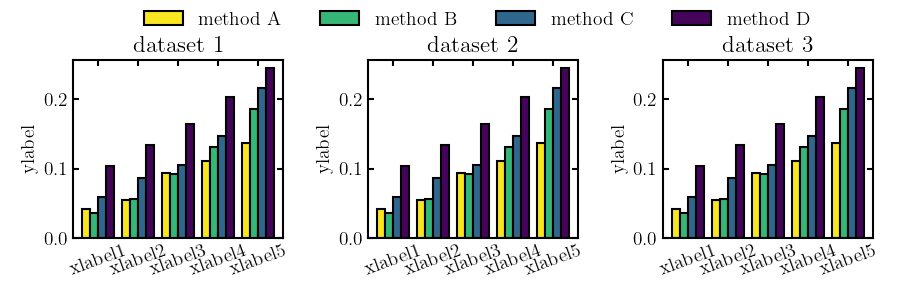

In [169]:
save_dir = "../figure"
dataset_names = ["dataset 1", "dataset 2", "dataset 3"]
method_names = ["method A", "method B", "method C", "method D"]
data1 = [[0.0409, 0.0543, 0.0943, 0.1115, 0.1363],
         [0.0351, 0.0557, 0.0916, 0.1315, 0.1860],
         [0.0586, 0.0865, 0.1046, 0.1476, 0.2160],
         [0.1043, 0.1344, 0.1638, 0.2035, 0.2446]]
data2 = [[0.0409, 0.0543, 0.0943, 0.1115, 0.1363],
         [0.0351, 0.0557, 0.0916, 0.1315, 0.1860],
         [0.0586, 0.0865, 0.1046, 0.1476, 0.2160],
         [0.1043, 0.1344, 0.1638, 0.2035, 0.2446]]
data3 = [[0.0409, 0.0543, 0.0943, 0.1115, 0.1363],
         [0.0351, 0.0557, 0.0916, 0.1315, 0.1860],
         [0.0586, 0.0865, 0.1046, 0.1476, 0.2160],
         [0.1043, 0.1344, 0.1638, 0.2035, 0.2446]]

draw_three_dataset_multibar(
    (data1, data2, data3),
    dataset_names, method_names,
    save_dir, "multibar_plot"
)